In [2]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(256, 256, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(4,activation='softmax')(x) #FC-layer

29084464/29084464 [==============================] - 0s 0us/step


In [5]:
model=Model(inputs=model_d.input,outputs=preds)

In [6]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
trdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

tsdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory="/content/gdrive/MyDrive/data/train",target_size=(256,256),batch_size = 32,
                                                 class_mode = 'categorical')
testdata = tsdata.flow_from_directory(directory="/content/gdrive/MyDrive/data/val", target_size=(256,256),batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("densenet.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

history = model.fit_generator( traindata,validation_data=testdata,epochs=20,callbacks=[checkpoint,early])

<ipython-input-9-3fd0658d73b5>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator( traindata,validation_data=testdata,epochs=20,callbacks=[checkpoint,early])


Epoch 1/20
61/61 [==============================] - ETA: 0s - loss: 0.6138 - accuracy: 0.8098

61/61 [==============================] - 703s 11s/step - loss: 0.6138 - accuracy: 0.8098 - val_loss: 0.3170 - val_accuracy: 0.8920
Epoch 2/20
61/61 [==============================] - ETA: 0s - loss: 0.3773 - accuracy: 0.8780

61/61 [==============================] - 44s 727ms/step - loss: 0.3773 - accuracy: 0.8780 - val_loss: 0.2264 - val_accuracy: 0.9012
Epoch 3/20
61/61 [==============================] - ETA: 0s - loss: 0.2696 - accuracy: 0.9088

61/61 [==============================] - 46s 753ms/step - loss: 0.2696 - accuracy: 0.9088 - val_loss: 0.1779 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - ETA: 0s - loss: 0.2952 - accuracy: 0.8990

61/61 [==============================] - 45s 734ms/step - loss: 0.2952 - accuracy: 0.8990 - val_loss: 0.1081 - val_accuracy: 0.9660
Epoch 5/20
61/61 [==============================] - ETA: 0s - loss: 0.2455 - accuracy: 0.9139

61/61 [==============================] - 45s 735ms/step - loss: 0.2455 - accuracy: 0.9139 - val_loss: 0.0980 - val_accuracy: 0.9691
Epoch 6/20
61/61 [==============================] - ETA: 0s - loss: 0.2217 - accuracy: 0.9216

61/61 [==============================] - 45s 744ms/step - loss: 0.2217 - accuracy: 0.9216 - val_loss: 0.0955 - val_accuracy: 0.9691
Epoch 7/20
61/61 [==============================] - ETA: 0s - loss: 0.2062 - accuracy: 0.9313

61/61 [==============================] - 46s 740ms/step - loss: 0.2062 - accuracy: 0.9313 - val_loss: 0.1100 - val_accuracy: 0.9691
Epoch 8/20
61/61 [==============================] - ETA: 0s - loss: 0.2161 - accuracy: 0.9221

61/61 [==============================] - 45s 732ms/step - loss: 0.2161 - accuracy: 0.9221 - val_loss: 0.0920 - val_accuracy: 0.9691
Epoch 9/20
61/61 [==============================] - ETA: 0s - loss: 0.1717 - accuracy: 0.9385

61/61 [==============================] - 45s 737ms/step - loss: 0.1717 - accuracy: 0.9385 - val_loss: 0.0820 - val_accuracy: 0.9753
Epoch 10/20
61/61 [==============================] - ETA: 0s - loss: 0.1760 - accuracy: 0.9354

61/61 [==============================] - 45s 733ms/step - loss: 0.1760 - accuracy: 0.9354 - val_loss: 0.0838 - val_accuracy: 0.9722
Epoch 11/20
61/61 [==============================] - ETA: 0s - loss: 0.1745 - accuracy: 0.9359

61/61 [==============================] - 46s 753ms/step - loss: 0.1745 - accuracy: 0.9359 - val_loss: 0.0850 - val_accuracy: 0.9722
Epoch 12/20
61/61 [==============================] - ETA: 0s - loss: 0.1860 - accuracy: 0.9400

61/61 [==============================] - 45s 733ms/step - loss: 0.1860 - accuracy: 0.9400 - val_loss: 0.0826 - val_accuracy: 0.9753
Epoch 13/20
61/61 [==============================] - ETA: 0s - loss: 0.1660 - accuracy: 0.9436

61/61 [==============================] - 45s 730ms/step - loss: 0.1660 - accuracy: 0.9436 - val_loss: 0.0614 - val_accuracy: 0.9753
Epoch 14/20
61/61 [==============================] - ETA: 0s - loss: 0.1548 - accuracy: 0.9498

61/61 [==============================] - 45s 737ms/step - loss: 0.1548 - accuracy: 0.9498 - val_loss: 0.0740 - val_accuracy: 0.9784
Epoch 15/20
61/61 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9411

61/61 [==============================] - 46s 761ms/step - loss: 0.1601 - accuracy: 0.9411 - val_loss: 0.0577 - val_accuracy: 0.9907
Epoch 16/20
61/61 [==============================] - ETA: 0s - loss: 0.1452 - accuracy: 0.9457

61/61 [==============================] - 45s 738ms/step - loss: 0.1452 - accuracy: 0.9457 - val_loss: 0.0423 - val_accuracy: 0.9938
Epoch 17/20
61/61 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9487

61/61 [==============================] - 45s 738ms/step - loss: 0.1353 - accuracy: 0.9487 - val_loss: 0.0451 - val_accuracy: 0.9907
Epoch 18/20
61/61 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9569

61/61 [==============================] - 46s 758ms/step - loss: 0.1229 - accuracy: 0.9569 - val_loss: 0.0988 - val_accuracy: 0.9691
Epoch 19/20
61/61 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9528

61/61 [==============================] - 45s 739ms/step - loss: 0.1455 - accuracy: 0.9528 - val_loss: 0.0649 - val_accuracy: 0.9722
Epoch 20/20
61/61 [==============================] - ETA: 0s - loss: 0.1230 - accuracy: 0.9569

61/61 [==============================] - 45s 735ms/step - loss: 0.1230 - accuracy: 0.9569 - val_loss: 0.0396 - val_accuracy: 0.9815


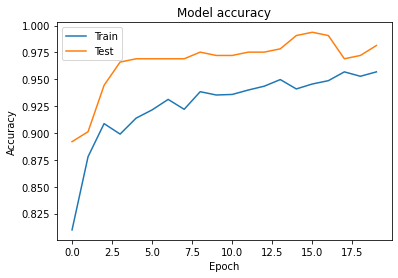

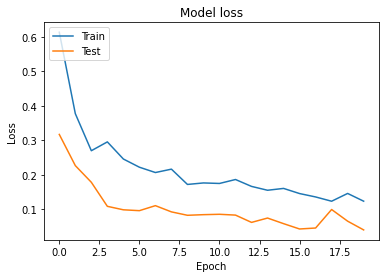

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
